(the-ignatian-way)=
# The Ignatian Way
---

![P1580313.jpg](img/P1580313.jpg)
$^{1}$Image credit: https://caminoignaciano.org/

## Background
The [Ignatian Way](https://caminoignaciano.org/en/) is a pilgrimage path that follows the route Ignatius of Loyola traveled in 1522 from Loyola to the city of Manresa. Starting in the Basque Country, it passes through Rioja, Navarre, Aragon and Catalonia, ending in Manresa —close to Barcelona, where Ignatius was due to embark for the Holy Land.

![map-ignatian-way_small.jpg](img/map-ignatian-way_small.png)

The journey starts in Loyola, the hometown of Saint Ignatius, and consists of some 660 km divided in 27 stages. In their first day, pilgrims arrive to the town I live in, and mostly in the summer I occasionally spot some of them walk through with their bulky backpacks. Often they seem to be foreigners and I usually wonder about the country they come from.

I decided to ask in the [Tourist Information Office](https://urolaturismoa.eus/es/) in Loyola, where they kindly provided me with the data after suggesting I could make for them this little study.

## The data
I was given the records with the number of pilgrims and their origins from 2016 to 2022.

```{note}
These records refer only to pilgrims that came into the tourist office. The sanctuary is the official starting point of this religious journey and not all pilgrims pop in the tourist office.
```

In [7]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data
ignatian = pd.read_csv("data/ignatian.csv", parse_dates=["date"], index_col="date")
print(ignatian)

            pax         from   region  type        notes
date                                                    
2016-12-31   63    Australia      NaN   NaN      Taldean
2016-12-31   54          USA      NaN   NaN      Taldean
2016-12-31   23        Italy      NaN   NaN      Taldean
2016-12-31   15  Philippines      NaN   NaN      Taldean
2016-12-31  144        Spain  Euskadi   NaN      Bakarka
...         ...          ...      ...   ...          ...
2022-09-01    2          USA      NaN  foot  25 ean hasi
2022-09-01    1       France      NaN  foot   27 an hasi
2022-10-31    0          NaN      NaN   NaN          NaN
2022-11-30    0          NaN      NaN   NaN          NaN
2022-12-31    0          NaN      NaN   NaN          NaN

[311 rows x 5 columns]


## Data Validation
In `type` column, some records contain the value `info`, meaning the record was not about actual pilgrims but instead related to people asking for information about the Ignatian Way.

In [8]:
# Show "info" type entries
ignatian_info = ignatian[ignatian["type"] == "info"]
print(ignatian_info)

            pax    from      region  type  \
date                                        
2019-07-26    2   Spain    Cataluña  info   
2019-08-03    3   Italy         NaN  info   
2019-08-16    3   Spain    Oiartzun  info   
2019-08-19    1   Spain    Donostia  info   
2019-08-23    1   Spain      Madrid  info   
2019-08-26    3  Libano         NaN  info   
2019-08-31    2   Spain  Errenteria  info   
2019-08-31    1   Japan         NaN  info   
2019-09-01    2   Spain    Azpeitia  info   
2019-09-22    1   Spain    Azpeitia  info   
2022-01-01    4   Spain    Galdakao  info   
2022-05-01   10      UK         NaN  info   

                                                        notes  
date                                                           
2019-07-26  Manresatik etorri dira, Gipuzkoari buruz galde...  
2019-08-03  Inguruko info bila etorri dira eta foiletoa ik...  
2019-08-16             2020ko Martxoan hasiko dira ziurrenik.  
2019-08-19    Ea Inaziotarbidearen mapa osoa genu

I therefore drop this `info` entries to proceed with the exploratory analysis.

In [9]:
# Remove "info" type entries
ignatian = ignatian[ignatian["type"] != "info"]

## Exploratory Data Analysis

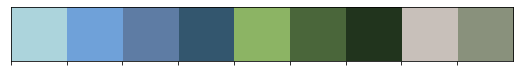

In [28]:
# Palette definition using https://imagecolorpicker.com/ on the image
palette_ign = ["#acd4dc", "#6fa1d9", "#5e7ca4", "#33566e",
               "#8cb464", "#4a663a", "#21341d",
               "#c8c0ba", "#89917c"]

# Plot palette
sns.palplot(sns.color_palette(palette_ign))

### Absolute numbers per year

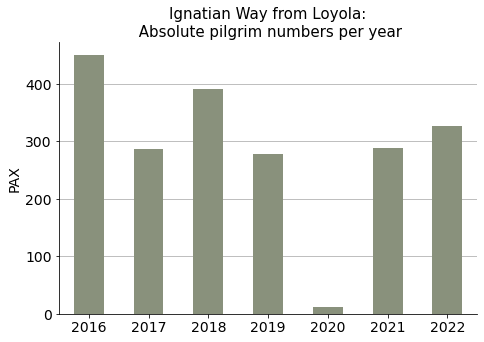

In [11]:
# Group by years and add pax numbers
ignatian_years = ignatian.groupby(ignatian.index.year)["pax"].sum()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

ignatian_years.plot(ax=ax, kind="bar", color=palette_ign[8])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Ignatian Way from Loyola:\n Absolute pilgrim numbers per year", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

### Average pilgrims per month
```{note}
To calculate mean values per month, 2020-pandemic year was skipped to avoid distorting average results. Neither were 2016, 2017 and 2018 considered, because data of these years came summarized and was not month-related.
```

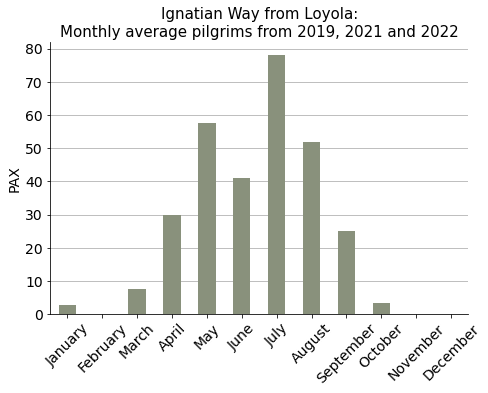

In [12]:
# Get values from 2019, 2021, 2022
ignatian_19_21_22 = pd.concat([ignatian.loc["2019"], ignatian.loc["2021"], ignatian.loc["2022"]])

# Group by months and add pax numbers, divide by the number of years considered: 3
ignatian_monthly_avg = ignatian_19_21_22.groupby(ignatian_19_21_22.index.month)["pax"].sum() / 3

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

ignatian_monthly_avg.plot(ax=ax, kind="bar", color=palette_ign[8])

ax.set_xticklabels(ignatian_19_21_22.index.month_name().unique(), rotation=45)
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Ignatian Way from Loyola:\nMonthly average pilgrims from 2019, 2021 and 2022", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

### International proportion

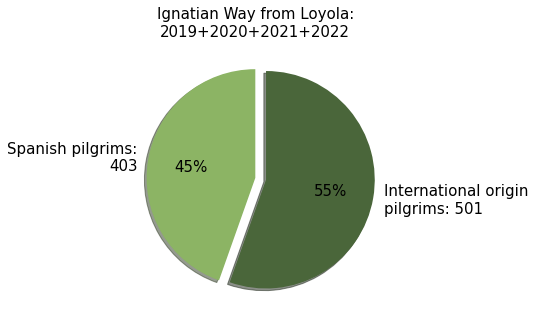

In [32]:
# Consider 2019 onwards because this is the data to be considered for the rest of the study
ignatian_19_20_21_22 = ignatian.loc["2019-01-31":]

# Calculate how many Spaniards came
spanish = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] == "Spain"]["pax"].sum()

# Calculate how many foreigners came
foreign = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] != "Spain"]["pax"].sum()

# Plot
labels = f"Spanish pilgrims:\n{spanish}", f"International origin\npilgrims: {foreign}"
sizes = [spanish, foreign]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.0f%%',
       normalize=True,
       shadow=True,
       startangle=90,
       colors=[palette_ign[4], palette_ign[5]],
       textprops={"size": 15},
      )

ax.set_title("Ignatian Way from Loyola:\n2019+2020+2021+2022", size=15)

plt.show()

### Group types
This is one piece of information that can be extracted from the data: How do pilgrims travel? Alone? With a partner? In small groups? Large ones?

Just by choice, I have considered small groups to be from 3 up to 6 people —6 included.

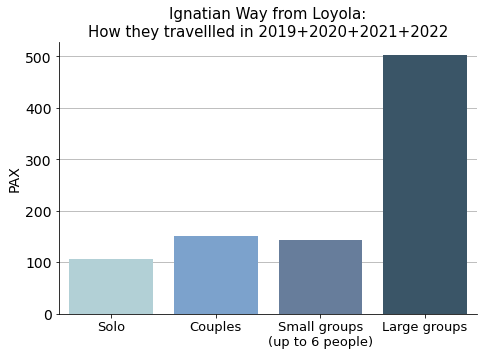

In [14]:
# Define the bins of the group types to be considered
small_threshold = 6 # <- just a choice
group_labels = ["solo", "couple", "small", "large"]
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, small_threshold), (small_threshold, 1000)])

# Create a new column with the group type assigned to the bin according to pax
ignatian_19_20_21_22["group"] = pd.cut(ignatian_19_20_21_22["pax"], bins).replace(bins, group_labels)

# Group by "group" and add pax numbers
groups = ignatian_19_20_21_22.groupby("group")["pax"].sum().to_frame()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.barplot(x=groups.index, y="pax", data=groups, ax=ax,
            palette=palette_ign)

ax.set_xticklabels(["Solo", "Couples", "Small groups\n(up to 6 people)", "Large groups"])
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_title("Ignatian Way from Loyola:\nHow they travellled in 2019+2020+2021+2022", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
sns.despine()

plt.show()

It appears that the Ignatian Way has a majority of pilgrims coming in large groups.

### International numbers by group type
Let's see where the pilgrims came from. I have done the study from 2019 onwards, because in 2016-17-18 some of the data is summarized without specifying the country.

First I will compute the origins excluding the Spanish pilgrims.

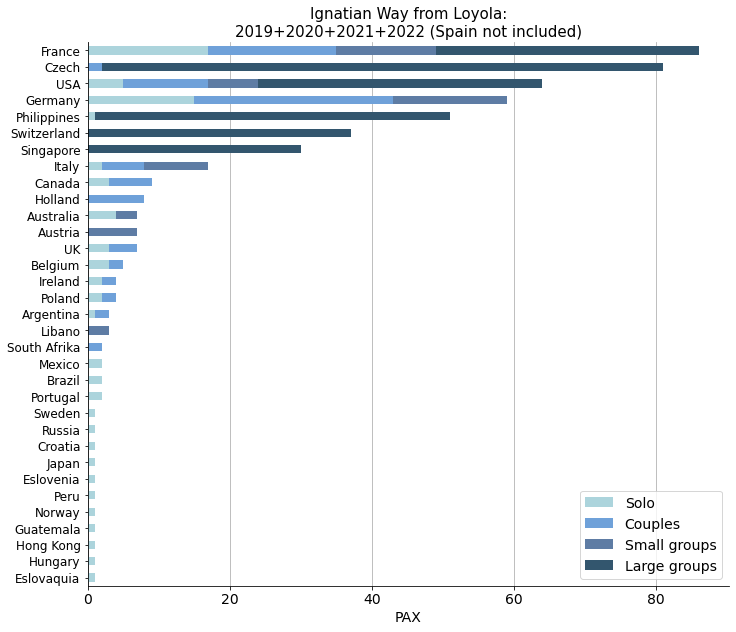

In [15]:
# Exclude Spain and group by origin and group-type, adding pax numbers
abroad_groups = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] != "Spain"]\
                .groupby(["from", "group"])["pax"].sum()
abroad_groups = pd.DataFrame(abroad_groups)

# Unstack inner level of index to a wide format table
abroad_groups_wide = abroad_groups.unstack()
abroad_groups_wide

# Create a new column "total" with the sum of the pax by group type
abroad_groups_wide[("pax", "total")] = abroad_groups_wide.sum(axis=1)
abroad_groups_wide

# Sort values by the "total" column, then drop this column
abroad_groups_wide_sorted = abroad_groups_wide.sort_values(("pax", "total"))
abroad_groups_wide_sorted_desc = abroad_groups_wide.sort_values(("pax", "total"), ascending=False)
abroad_groups_wide_sorted = abroad_groups_wide_sorted.drop(("pax", "total"), axis=1)
abroad_groups_wide_sorted_desc = abroad_groups_wide_sorted_desc.drop(("pax", "total"), axis=1)
    
# Plot
fig, ax = plt.subplots(figsize=(11.5, 10))

abroad_groups_wide_sorted.plot(kind="barh", stacked=True, ax=ax, color=palette_ign)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Ignatian Way from Loyola:\n2019+2020+2021+2022 (Spain not included)",
             size=15)
ax.set_xlabel("PAX", size=14)
ax.set_ylabel("", size=14)
ax.legend(["Solo", "Couples", "Small groups", "Large groups"], fontsize=14, loc='lower right')

sns.despine()
plt.show()

Not surpisingly, neighbouring French pilgrims come first in the list. What was more surprising was the relative amount of people from the Czech Republic, the Philippines or Singapore. We learn from this stacked bar chart that these came mainly in large groups, maybe organized by Jesuit communities.

I select some significant countries on a point plot for a comparison between them.

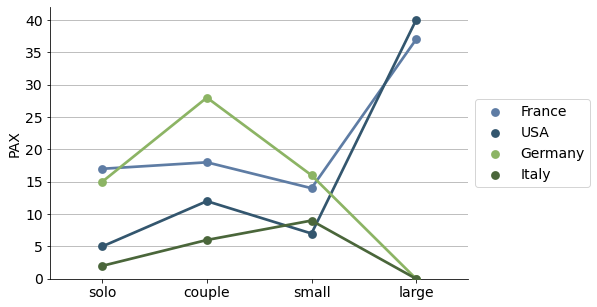

In [16]:
# Selection of the countries to compare
countries_selected = ["France", "USA", "Germany", "Italy"]
abroad_groups_ = abroad_groups_wide_sorted_desc.stack().reset_index()
abroad_groups__ = abroad_groups_[abroad_groups_["from"].isin(countries_selected)]

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.pointplot(x="group", y="pax", data=abroad_groups__, ax=ax,
              hue="from", palette=palette_ign[2:6])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.set_ylim(0)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=14)
sns.despine()

plt.show()

### Spain's numbers by group type
Spanish pilgrims amount to the majority and also have some more specific informartion about their origins in the column called `region`.

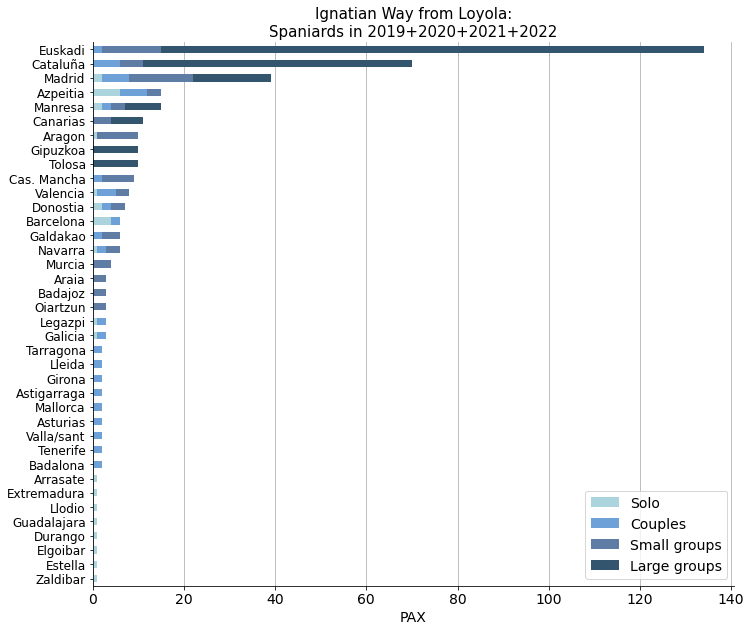

In [17]:
# Take Spain and group by its regions and group-type, adding pax numbers
spain_groups = ignatian_19_20_21_22[ignatian_19_20_21_22["from"] == "Spain"]\
                .groupby(["region", "group"])["pax"].sum()
spain_groups = pd.DataFrame(spain_groups)

# Unstack inner level of index to a wide format table
spain_groups_wide = spain_groups.unstack()

# Create a new column "total" with the sum of the pax by group type
spain_groups_wide[("pax", "total")] = spain_groups_wide.sum(axis=1)

# Sort values by the "total" column, then drop this column
spain_groups_wide_sorted = spain_groups_wide.sort_values(("pax", "total"))\
                            .drop(("pax", "total"), axis=1)

# Plot
fig, ax = plt.subplots(figsize=(11.5, 10))

spain_groups_wide_sorted.plot(kind="barh", stacked=True, ax=ax, color=palette_ign)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Ignatian Way from Loyola:\nSpaniards in 2019+2020+2021+2022",
             size=15)
ax.set_xlabel("PAX", size=14)
ax.set_ylabel("", size=14)
ax.legend(["Solo", "Couples", "Small groups", "Large groups"], fontsize=14, loc='lower right')

sns.despine()
plt.show()

Pilgrims from the Basque Country come first, followed by Catalans and the people from Madrid.

## Forecast

### Build trend
First, I prepare a data frame to show monthly figures (one entry per month with the sum of PAX numbers).

```{note}
Because of the data format already mentioned, I must consider from 2019 onwards. But 2020 (the Covid-19 pandemic year) was not a normal one so I am not taking it into account for prediction purposes. However, to build the trend to forecast, as it is still a useful information, I have shifted the data from 2019 into a fictional 2020.
```

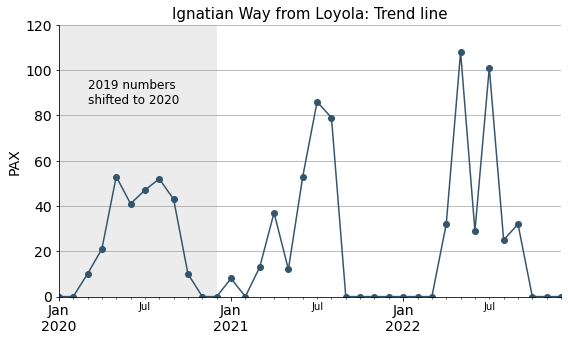

In [18]:
# 2019-----------------------------------
# Get pax numbers from 2019
ignatian_pax_19_as_20 = ignatian.loc["2019"]["pax"]

# Add an offset of 1 year to 2019 index
ignatian_pax_19_as_20.index = ignatian_pax_19_as_20.index + pd.DateOffset(years=1)

# Group by months and add pax numbers
ignatian_pax_19_as_20_monthly = ignatian_pax_19_as_20.groupby(ignatian_pax_19_as_20.index.month).sum()

# Create an index with the twelve months and assign it
twelve_months_20 = pd.date_range(start="2020-01-01", freq="M", periods=12)
ignatian_pax_19_as_20_monthly.index = twelve_months_20

# 2021-----------------------------------
# Get pax numbers from 2021
ignatian_pax_21 = ignatian.loc["2021"]["pax"]
ignatian_pax_21_monthly = ignatian_pax_21.groupby(ignatian_pax_21.index.month).sum()
twelve_months_21 = pd.date_range(start="2021-01-01", freq="M", periods=12)
ignatian_pax_21_monthly.index = twelve_months_21

# 2022-----------------------------------
ignatian_pax_22 = ignatian.loc["2022"]["pax"]
ignatian_pax_22_monthly = ignatian_pax_22.groupby(ignatian_pax_22.index.month).sum()
twelve_months_22 = pd.date_range(start="2022-01-01", freq="M", periods=12)
ignatian_pax_22_monthly.index = twelve_months_22


# Build the time series
ignatian_trend = pd.concat([ignatian_pax_19_as_20_monthly,
                            ignatian_pax_21_monthly,
                            ignatian_pax_22_monthly])

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ignatian_trend.plot(ax=ax, marker="o", color=palette_ign[3])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Ignatian Way from Loyola: Trend line", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.axvspan("2020-01-01", "2020-12-31", facecolor='grey', alpha=0.15)
ax.annotate("2019 numbers\nshifted to 2020", xy=(pd.Timestamp("2020-03-15"), 85),fontsize=12)
ax.set_ylim(0, 120)
sns.despine()

plt.show()

### Forecasting
I run the *Augmented Dicky-Fuller* test to see if the trend is stationary.

In [19]:
# Import statsmodels and other packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Run augmented dicky-fuller test function
result = adfuller(ignatian_trend)
result
print(f"Test statistics: {result[0]:.2f}")
print(f"p-value: {result[1]:.2f}")

Test statistics: -4.40
p-value: 0.00


It looks like it is stationary, i.e. has no statistically significant trend: that means the number of pilgrims during the last years has not changed substancially and there is no apparent trend either upwards nor downwards.

Let's learn about its seasonality with the autocorrelation function.

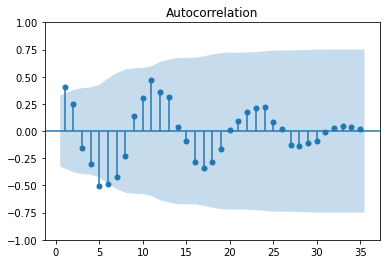

In [20]:
# Plot the ACF (AutoCorrelation Function)
plot_acf(ignatian_trend, lags=35, zero=False)

# Show figure
plt.show()

As expected, it shows a 12 month seasonality!

A SARIMA (Seasonal ARIMA) model has to be selected and that for I automate the process of calculating the model parameters using the appropriate module and narrowing the search to seasonal 12 lags.

In [21]:
# # Calculate SARIMA model parameters
# model = pm.auto_arima(ignatian_trend,
#                       seasonal=True, m=12,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True)
# 
# # Print model summary
# print(model.summary())

This resulted in a set of best model parameters, which I feed into the SARIMA model to forecast the numbers in 2023.

In [22]:
%%capture
# Create a SARIMA model
model = SARIMAX(ignatian_trend,
                order=(0, 0, 0),
                seasonal_order=(1, 1, 0, 12))

# Fit the model
results = model.fit()

Model diagnostics plots are shown below.

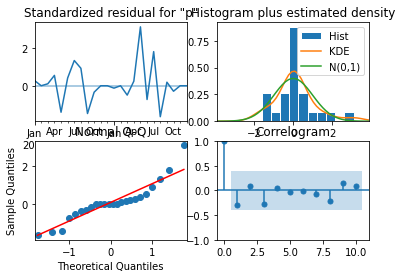

In [23]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

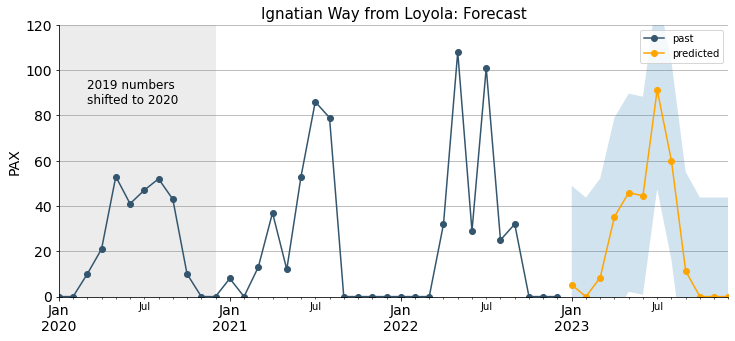

In [24]:
# Create forecast object
forecast_object = results.get_forecast(steps=12)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot past
ignatian_trend.plot(ax=ax, marker="o", label="past", color=palette_ign[3])

# Plot predicted
mean.plot(ax=ax, marker="o", label="predicted", color="orange")

# Shade between the confidence intervals
ax.fill_between(mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Ignatian Way from Loyola: Forecast", size=15)
ax.set_xlabel("")
ax.set_ylabel("PAX", size=14)
ax.axvspan("2020-01-01", "2020-12-31", facecolor='grey', alpha=0.15)
ax.annotate("2019 numbers\nshifted to 2020", xy=(pd.Timestamp("2020-03-15"), 85),fontsize=12)
ax.set_ylim(0, 120)
ax.legend()
sns.despine()

plt.show()

(Besides the forecast, note the confidence intervals shown with shading.)

These are the predicted figures for each month in 2023:

In [25]:
# List predicted mean values for 2023
monthly_2023 = pd.DataFrame(mean.apply(lambda x: "{:,.0f}".format(x)))
print(monthly_2023)

           predicted_mean
2023-01-31              5
2023-02-28              0
2023-03-31              8
2023-04-30             35
2023-05-31             46
2023-06-30             45
2023-07-31             91
2023-08-31             60
2023-09-30             11
2023-10-31             -0
2023-11-30             -0
2023-12-31             -0


## Conclusions

In this little data analysis and prediction project some insights were shared about the actual figures in the Ignatian Way provided by the Tourist Information Office in Loyola. As mentioned, this data could probably be supplemented with more records coming from other sources as not all pilgrims seem to visit the Tourist Office while setting off. It could be interesting to have more data because the available one looks scarce to proceed with a full-fledged analysis.

Additionally, if some more features from pilgrims were provided (like age, gender, motives, etc.), it would be possible to proceed with a pilgrim-type segmentation analysis.